# E-static Rectangular Element
---

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

In [2]:
from gpt.estatic import Erect
from gpt.lattice import Lattice

from gpt import GPT

from beamphysics import single_particle
import os

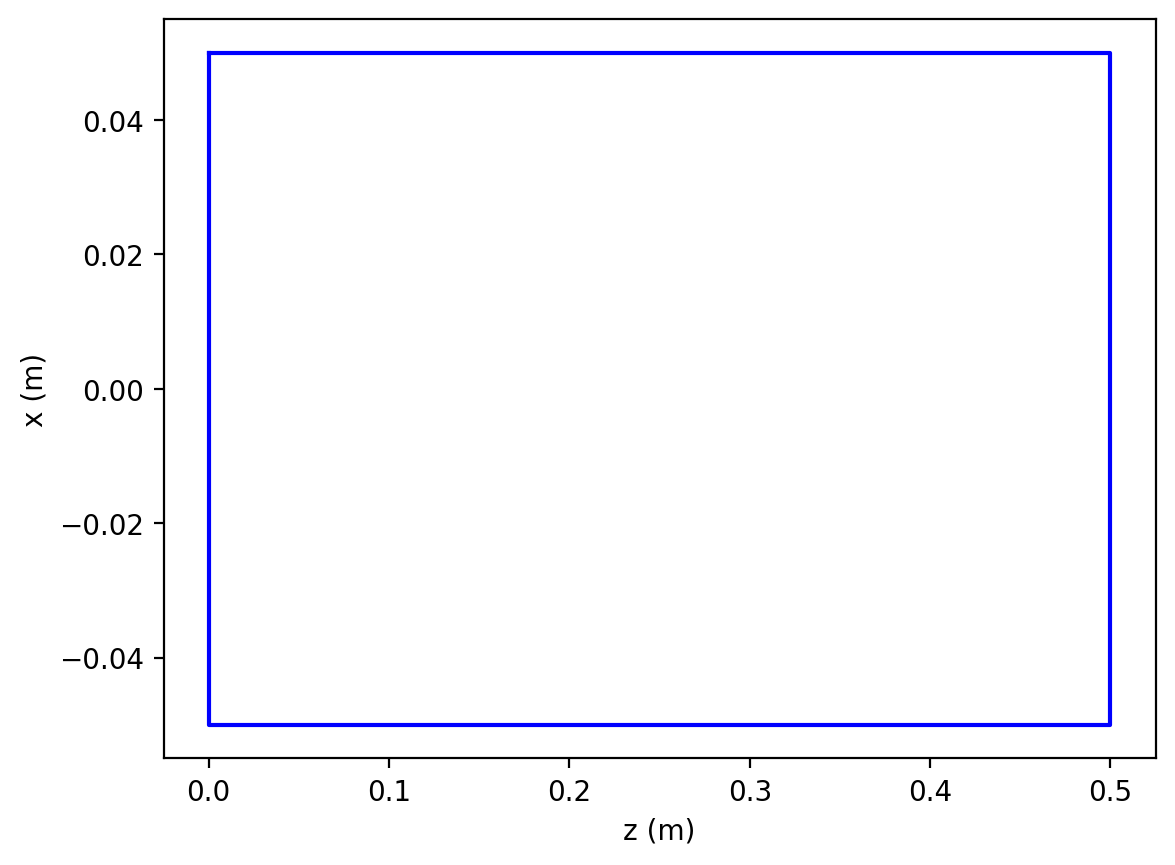

In [3]:
a=0.1
b=0.2
L=0.5
E0=-1e6

E = Erect('ER', a, b, L, E0)
E.place()
E.plot_floor()

In [4]:
E.gpt_lines()

['\n#***********************************************',
 '#             Erect: ER           ',
 '#***********************************************',
 'ER_x = 0;',
 'ER_y = 0;',
 'ER_z = 0.25;\nER_yaw = 0;',
 'ER_pitch = 0;',
 'ER_roll = 0;\n',
 'ER_a = 0.1;',
 'ER_b = 0.2;',
 'ER_L = 0.5;',
 'ER_E = -1000000.0;',
 '\nerect("wcs", "LxyzXYZ", ER_x, ER_y, ER_z, ER_yaw, ER_pitch, ER_roll,  ER_a, ER_b, ER_L, ER_E);']

## With Lattice Generation

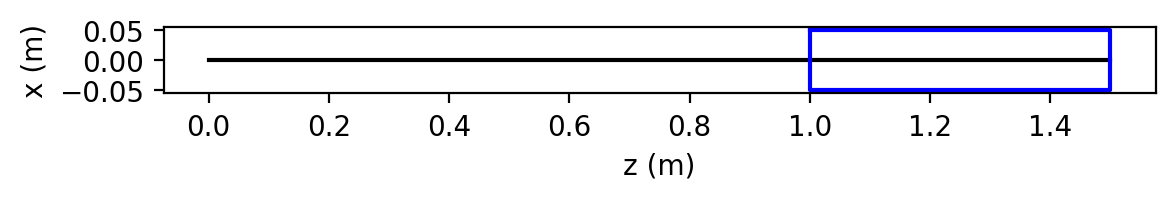

In [5]:
lat = Lattice('etest')
lat.add(Erect('ER', a, b, L, E0, global_element=True), ds=1.0, element_origin='beg')
lat.plot_floor()
lat.write_gpt_lines(output_file='gpt.temp.in');

In [6]:
G = GPT('gpt.temp.in', initial_particles=single_particle(pz=10e6))
G.set_variable('Ntout', 500)
G.run()

In [7]:
from matplotlib import pyplot as plt

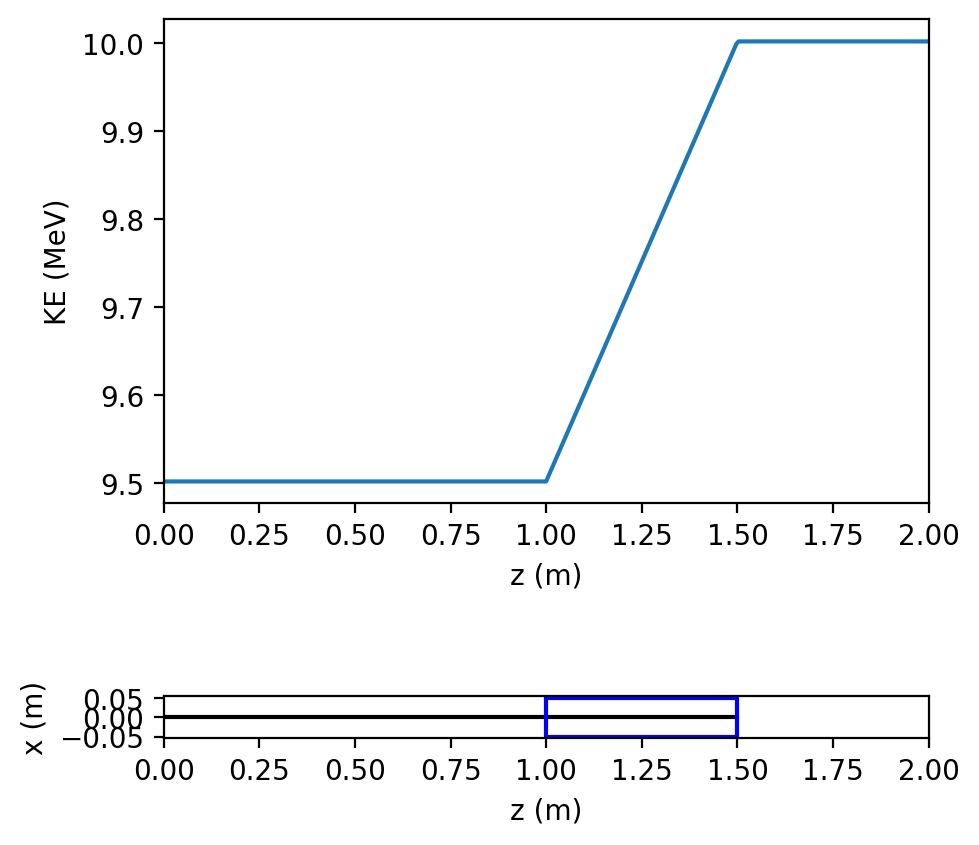

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5))

axs[0].plot(G.tout_stat('mean_z'), G.tout_stat('mean_kinetic_energy')/1e6)
axs[0].set_xlabel('z (m)')
axs[0].set_ylabel(r'KE (MeV)')

G.lattice.plot_floor(ax = axs[1])

axs[0].set_xlim([0, 2])
axs[1].set_xlim([0, 2])

plt.tight_layout()

In [9]:
def check_parsing():

    lat1 = Lattice('parse_test')

    a=0.1
    b=0.2
    L=0.5
    E0=-1e6
    
    lat1.add(Erect('ER', a, b, L, E0, global_element=True), ds=1.0, element_origin='beg')
    lat1.write_gpt_lines(output_file='parse_test.temp.in');

    G = GPT('parse_test.temp.in')
    lat2 = G.lattice

    os.remove('parse_test.temp.in')
    
    # Basic info
    assert lat1['ER']._length==lat2['ER']._length
    assert lat1['ER']._width==lat2['ER']._width
    assert lat1['ER']._height==lat2['ER']._height
    #assert lat1['ER']._ecs==lat2['ER']._ecs  # FIX
    assert lat1['ER'].name == lat2['ER'].name

    # Element specific
    #assert lat1['ER'].a == lat2['ER'].a
    #assert lat1['ER'].b == lat2['ER'].b
    assert lat1['ER']._E0 == lat2['ER']._E0

    

check_parsing()

In [10]:
if os.path.exists('gpt.temp.in'):
    os.remove('gpt.temp.in')